In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm

In [3]:
US_video=pd.read_csv("USvideos.csv")

In [4]:
US_video.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [5]:
print(US_video.columns)
print(US_video.dtypes)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


In [6]:
print(US_video["video_id"].value_counts())

j4KvrAUjn6c    30
r-3iathMo7o    29
QBL8IRJ5yHU    29
NBSAQenU2Bk    29
8h--kFui1JA    29
               ..
FV4t5D0rwFs     1
wnwF1FHybDQ     1
1iGBHh1q0Kg     1
2vQ_fnlvvr8     1
Ho8Q_ebYgZc     1
Name: video_id, Length: 6351, dtype: int64


In [7]:
print(US_video["publish_time"].value_counts())
US_video["publish_time"]=pd.to_datetime(US_video["publish_time"])

2018-05-18T14:00:04.000Z    50
2018-05-06T13:00:05.000Z    32
2018-05-13T18:03:56.000Z    30
2018-05-14T13:00:01.000Z    29
2018-05-14T15:59:47.000Z    29
                            ..
2017-11-27T14:00:02.000Z     1
2017-11-12T18:00:03.000Z     1
2018-03-27T07:35:00.000Z     1
2017-11-30T14:00:07.000Z     1
2018-03-02T05:10:46.000Z     1
Name: publish_time, Length: 6269, dtype: int64


In [8]:
US_video=US_video.assign(publish_day=US_video.publish_time.dt.day,publish_month=US_video.publish_time.dt.month,publish_year=US_video.publish_time.dt.year)

<AxesSubplot:xlabel='publish_year', ylabel='count'>

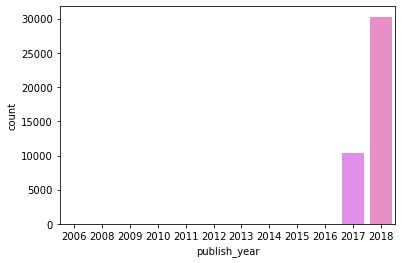

In [9]:
sns.countplot(x=US_video["publish_year"],data=US_video)

In [10]:
US_video.drop(US_video[US_video["publish_year"]<2017].index,inplace=True)

<ipython-input-11-bcfb96a5d15d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  US_video.groupby("publish_year")["likes","dislikes","views","comment_count"].mean()


,likes,dislikes,views,comment_count
publish_year,,,,
2017,47935.029824,2991.047277,1.313908e+06,5780.985232
2018,83925.168533,3988.920374,2.739773e+06,9431.740117


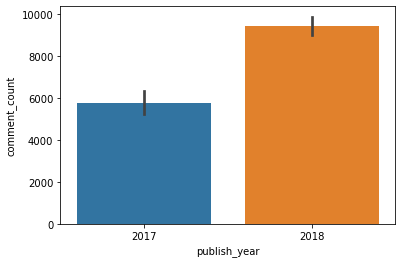

In [11]:
sns.barplot(x=US_video["publish_year"],y=US_video["comment_count"])
US_video.groupby("publish_year")["likes","dislikes","views","comment_count"].mean()

<AxesSubplot:xlabel='publish_year', ylabel='views'>

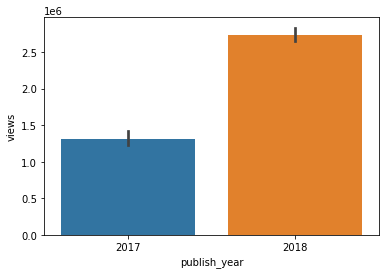

In [12]:

sns.barplot(x=US_video["publish_year"],y=US_video["views"])

<AxesSubplot:xlabel='publish_year', ylabel='likes'>

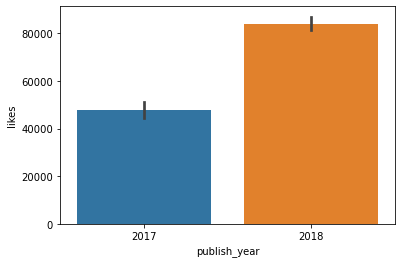

In [13]:
sns.barplot(x=US_video["publish_year"],y=US_video["likes"])


<AxesSubplot:xlabel='publish_year', ylabel='dislikes'>

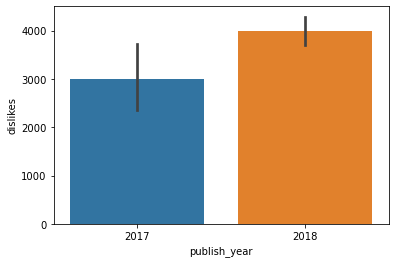

In [14]:
sns.barplot(x=US_video["publish_year"],y=US_video["dislikes"])

<AxesSubplot:xlabel='publish_month', ylabel='likes'>

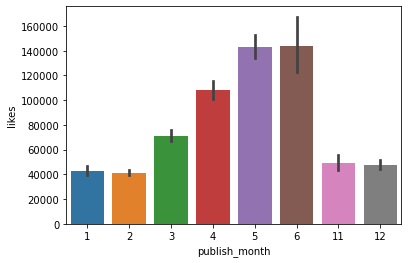

In [15]:
sns.countplot(x=US_video["publish_month"],data=US_video)
US_video.drop(US_video[(US_video["publish_month"]<11) & (US_video["publish_month"]>7)].index,inplace=True)
sns.barplot(x=US_video["publish_month"],y=US_video["likes"])

<AxesSubplot:xlabel='publish_month', ylabel='dislikes'>

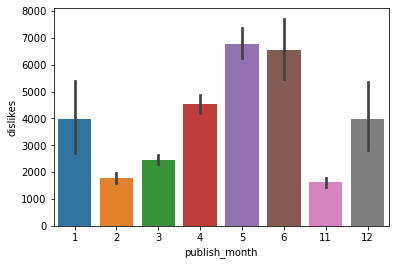

In [16]:
sns.barplot(x=US_video["publish_month"],y=US_video["dislikes"])

<AxesSubplot:xlabel='publish_month', ylabel='views'>

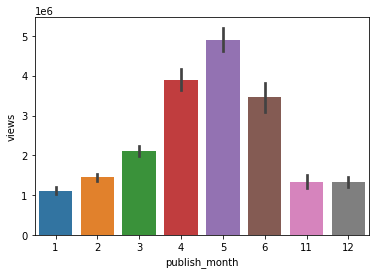

In [17]:
sns.barplot(x=US_video["publish_month"],y=US_video["views"])

<ipython-input-18-43672d1a627b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  US_video.groupby("publish_month")["likes","dislikes","views","comment_count"].mean()


,likes,dislikes,views,comment_count
publish_month,,,,
1,43058.747087,3973.271304,1.114892e+06,6737.001275
2,41465.552958,1764.652104,1.447916e+06,5067.605352
3,71427.723868,2463.214751,2.100250e+06,7653.214588
4,108474.880386,4542.152469,3.900867e+06,10670.030494
5,143137.735986,6766.430681,4.904549e+06,15477.199066
6,143984.910308,6553.883534,3.453943e+06,17677.775100
11,49151.855100,1616.097235,1.327496e+06,5657.602240
12,47743.088632,3969.174337,1.321756e+06,5941.969426


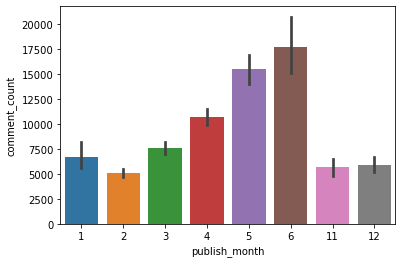

In [18]:
sns.barplot(x=US_video["publish_month"],y=US_video["comment_count"])
US_video.groupby("publish_month")["likes","dislikes","views","comment_count"].mean()

In [19]:
print(US_video["trending_date"].value_counts())
US_video["trending_date"]=pd.to_datetime(US_video["trending_date"],format="%y.%d.%m")
US_video=US_video.assign(trending_day=US_video.trending_date.dt.day,trending_month=US_video.trending_date.dt.month,trending_year=US_video.trending_date.dt.year)


18.28.04    200
18.26.03    200
18.03.06    200
18.30.03    200
17.13.12    200
           ... 
18.01.01    191
17.31.12    191
18.02.01    191
17.26.11    190
17.27.11    188
Name: trending_date, Length: 205, dtype: int64


<AxesSubplot:xlabel='trending_year', ylabel='count'>

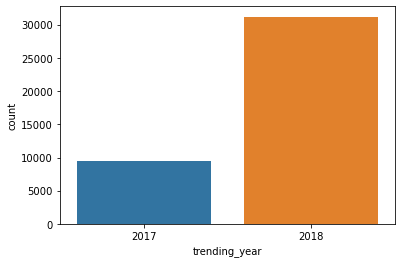

In [20]:
sns.countplot(x=US_video["trending_year"],data=US_video)

<AxesSubplot:xlabel='trending_year', ylabel='likes'>

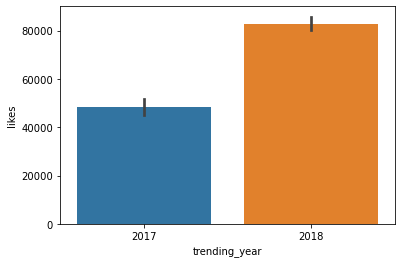

In [21]:
sns.barplot(x=US_video["trending_year"],y=US_video["likes"])

<AxesSubplot:xlabel='trending_year', ylabel='dislikes'>

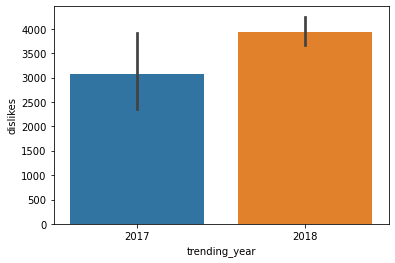

In [22]:
sns.barplot(x=US_video["trending_year"],y=US_video["dislikes"])

<AxesSubplot:xlabel='trending_year', ylabel='views'>

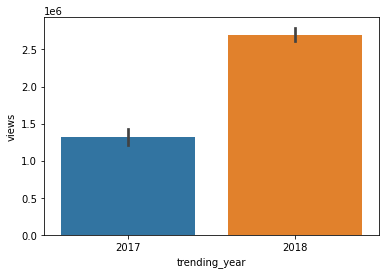

In [23]:
sns.barplot(x=US_video["trending_year"],y=US_video["views"])

<ipython-input-24-bcf33187e70c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  US_video.groupby("trending_year")["likes","dislikes","views","comment_count"].mean()


,likes,dislikes,views,comment_count
trending_year,,,,
2017,48256.138536,3067.878490,1.315087e+06,5892.811760
2018,82864.147698,3942.026545,2.700087e+06,9301.802001


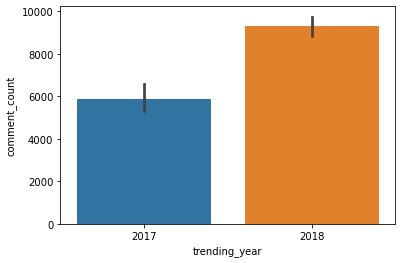

In [24]:
sns.barplot(x=US_video["trending_year"],y=US_video["comment_count"])
US_video.groupby("trending_year")["likes","dislikes","views","comment_count"].mean()

<AxesSubplot:xlabel='trending_month', ylabel='count'>

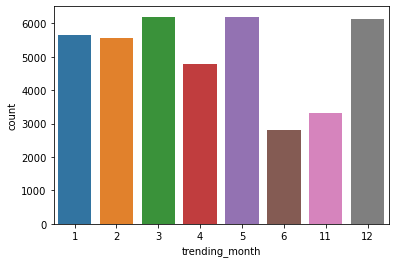

In [25]:
sns.countplot(x=US_video["trending_month"],data=US_video)

<AxesSubplot:xlabel='trending_month', ylabel='likes'>

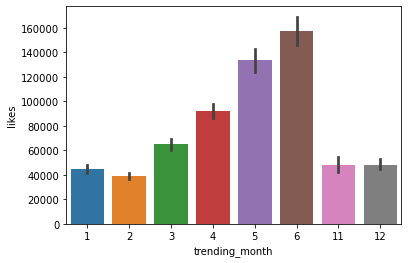

In [26]:
sns.barplot(x=US_video["trending_month"],y=US_video["likes"])

<AxesSubplot:xlabel='trending_month', ylabel='dislikes'>

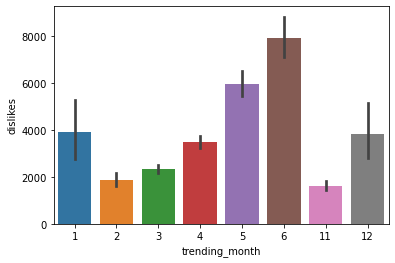

In [27]:
sns.barplot(x=US_video["trending_month"],y=US_video["dislikes"])

<AxesSubplot:xlabel='trending_month', ylabel='views'>

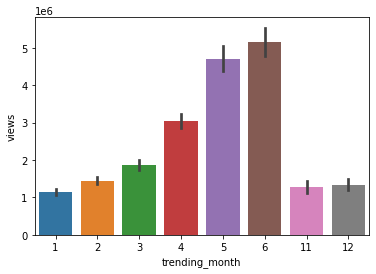

In [28]:
sns.barplot(x=US_video["trending_month"],y=US_video["views"])

<ipython-input-29-ab54c0147f4d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  US_video.groupby("trending_month")["likes","dislikes","views","comment_count"].mean()


,likes,dislikes,views,comment_count
trending_month,,,,
1,44588.155276,3937.803824,1.139399e+06,6762.877479
2,39175.762675,1883.890687,1.446565e+06,4515.005214
3,65147.867055,2333.682031,1.867793e+06,7499.094614
4,92189.282500,3491.853542,3.039599e+06,9475.014167
5,133593.568801,5949.443781,4.707389e+06,14507.846427
6,157680.232500,7917.900357,5.150089e+06,16089.823929
11,48024.287009,1633.917523,1.269075e+06,5319.835952
12,48381.004881,3840.154897,1.339868e+06,6201.394566


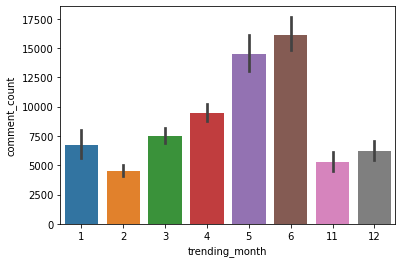

In [29]:
sns.barplot(x=US_video["trending_month"],y=US_video["comment_count"])
US_video.groupby("trending_month")["likes","dislikes","views","comment_count"].mean()

In [30]:
print(US_video["title"].value_counts())
print(US_video["channel_title"].value_counts())

WE MADE OUR MOM CRY...HER DREAM CAME TRUE!                                      30
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures    29
Why I'm So Scared (being myself and crying too much)                            29
YoungBoy Never Broke Again Goes Sneaker Shopping With Complex                   29
Rooster Teeth Animated Adventures - Millie So Serious                           29
                                                                                ..
Neil Patrick Harris' Guest Host Monologue on Jimmy Kimmel Live                   1
Butter Tubes Make Spreading Butter Easy                                          1
Footage of starving polar bear exposes climate change impact                     1
Girls Who Love Cheese                                                            1
CEOs Try to Predict the Future in 10 Years | Vanity Fair                         1
Name: title, Length: 6368, dtype: int64
ESPN                                      203
T

In [31]:
US_video["category_id"]=US_video["category_id"].astype("object")
print(US_video["category_id"].value_counts())

24    9902
10    6442
26    4140
23    3446
22    3190
25    2472
28    2378
1     2291
17    2150
27    1631
15     918
20     811
19     400
2      363
29      57
43      57
Name: category_id, dtype: int64


<AxesSubplot:xlabel='category_id', ylabel='views'>

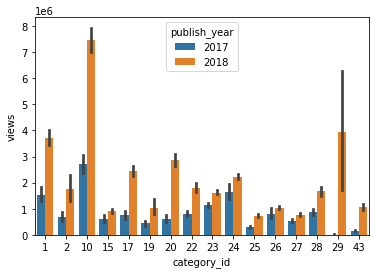

In [32]:
sns.barplot(x=US_video["category_id"],y=US_video["views"],data=US_video,hue="publish_year")


<AxesSubplot:xlabel='category_id', ylabel='likes'>

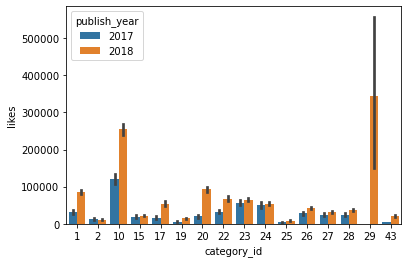

In [33]:
sns.barplot(x=US_video["category_id"],y=US_video["likes"],data=US_video,hue="publish_year")



<AxesSubplot:xlabel='category_id', ylabel='dislikes'>

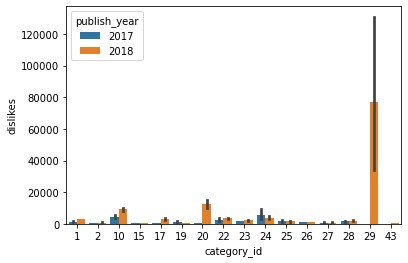

In [34]:
sns.barplot(x=US_video["category_id"],y=US_video["dislikes"],data=US_video, hue="publish_year")



<AxesSubplot:xlabel='category_id', ylabel='comment_count'>

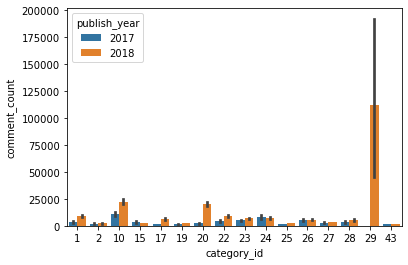

In [35]:
sns.barplot(x=US_video["category_id"],y=US_video["comment_count"],data=US_video,hue="publish_year")


In [36]:
US_video.groupby("category_id")["views","likes","dislikes","comment_count"].mean()

<ipython-input-36-8a97d236624b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  US_video.groupby("category_id")["views","likes","dislikes","comment_count"].mean()


,views,likes,dislikes,comment_count
category_id,,,,
1,3.177545e+06,72429.220864,2650.817110,7803.734177
2,1.433328e+06,11680.798898,667.504132,2158.316804
10,6.229605e+06,219935.847563,7944.531046,19449.638777
15,8.329431e+05,21100.943355,574.486928,2898.369281
17,2.048421e+06,45869.900465,2387.667907,5205.570233
19,8.588869e+05,12090.582500,851.067500,2278.767500
20,2.639886e+06,85125.573366,11324.737361,18175.377312
22,1.541038e+06,58498.268966,3193.493103,7767.160815
23,1.484667e+06,62781.291352,2098.130006,6542.336332


In [37]:
print(US_video["views"].describe())


count    4.064800e+04
mean     2.377893e+06
std      7.418755e+06
min      5.490000e+02
25%      2.490940e+05
50%      6.911940e+05
75%      1.837612e+06
max      2.252119e+08
Name: views, dtype: float64


In [38]:
print(US_video["likes"].describe())


count    4.064800e+04
mean     7.481324e+04
std      2.296428e+05
min      0.000000e+00
25%      5.613750e+03
50%      1.838700e+04
75%      5.592300e+04
max      5.613827e+06
Name: likes, dtype: float64


In [39]:
print(US_video["dislikes"].describe())


count    4.064800e+04
mean     3.738672e+03
std      2.913526e+04
min      0.000000e+00
25%      2.090000e+02
50%      6.410000e+02
75%      1.958250e+03
max      1.674420e+06
Name: dislikes, dtype: float64


In [40]:
print(US_video["comment_count"].describe())

count    4.064800e+04
mean     8.508764e+03
std      3.756187e+04
min      0.000000e+00
25%      6.290000e+02
50%      1.881000e+03
75%      5.815000e+03
max      1.361580e+06
Name: comment_count, dtype: float64


In [41]:
x1=np.log(US_video["views"])
y1=np.log(US_video["likes"])
y2=np.log(US_video["dislikes"])
y3=np.log(US_video["comment_count"])


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='views', ylabel='likes'>

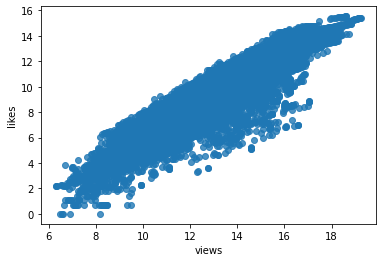

In [42]:
sns.regplot(x=x1,y=y1,fit_reg=False)

<AxesSubplot:xlabel='views', ylabel='dislikes'>

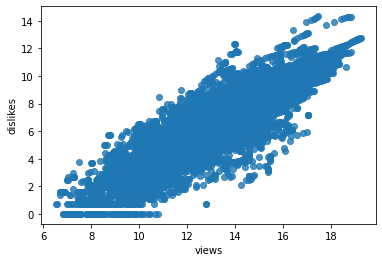

In [43]:
sns.regplot(x=x1,y=y2,fit_reg=False)

<AxesSubplot:xlabel='views', ylabel='comment_count'>

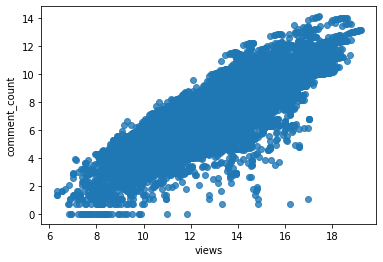

In [44]:
sns.regplot(x=x1,y=y3,fit_reg=False)

In [45]:
num_data=US_video.select_dtypes(exclude=["object","bool"])
num_data.corr()

,views,likes,dislikes,comment_count,publish_day,publish_month,publish_year,trending_day,trending_month,trending_year
views,1.000000,0.849064,0.472119,0.617442,-0.036457,-0.025723,0.083357,-0.000720,-0.010667,0.078879
likes,0.849064,1.000000,0.447082,0.802981,-0.021299,-0.015617,0.067806,-0.000054,-0.003472,0.063674
dislikes,0.472119,0.447082,1.000000,0.700145,-0.028048,0.000378,0.014678,-0.007428,0.004269,0.012677
comment_count,0.617442,0.802981,0.700145,1.000000,-0.020298,-0.012197,0.041990,0.000718,-0.004714,0.038346
publish_day,-0.036457,-0.021299,-0.028048,-0.020298,1.000000,0.058011,-0.101952,0.113836,0.044293,-0.045246
publish_month,-0.025723,-0.015617,0.000378,-0.012197,0.058011,1.000000,-0.941995,0.048824,0.903854,-0.882504
publish_year,0.083357,0.067806,0.014678,0.041990,-0.101952,-0.941995,1.000000,-0.063504,-0.841869,0.940880
trending_day,-0.000720,-0.000054,-0.007428,0.000718,0.113836,0.048824,-0.063504,1.000000,0.077332,-0.138492
trending_month,-0.010667,-0.003472,0.004269,-0.004714,0.044293,0.903854,-0.841869,0.077332,1.000000,-0.927438
trending_year,0.078879,0.063674,0.012677,0.038346,-0.045246,-0.882504,0.940880,-0.138492,-0.927438,1.000000


<AxesSubplot:xlabel='likes', ylabel='comment_count'>

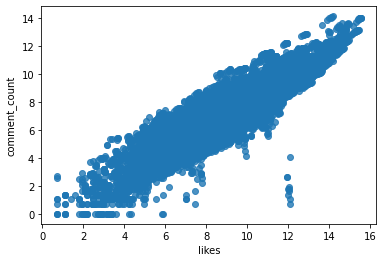

In [46]:
sns.regplot(x=y1,y=y3,fit_reg=False)

<AxesSubplot:xlabel='dislikes', ylabel='comment_count'>

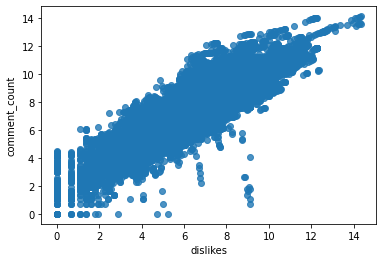

In [47]:
sns.regplot(x=y2,y=y3,fit_reg=False)

False    40025
True       623
Name: comments_disabled, dtype: int64


<AxesSubplot:xlabel='comments_disabled', ylabel='count'>

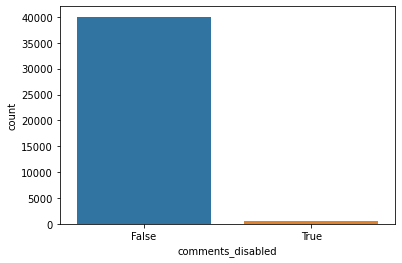

In [48]:
print(US_video["comments_disabled"].value_counts())
sns.countplot(x="comments_disabled",data=US_video)

<AxesSubplot:xlabel='comments_disabled', ylabel='likes'>

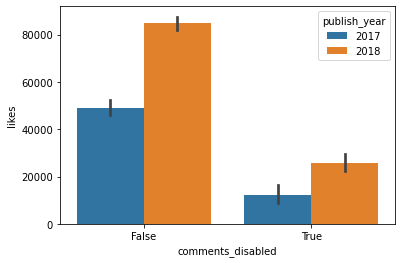

In [49]:
sns.barplot(x="comments_disabled",y="likes",data=US_video,hue="publish_year")



<AxesSubplot:xlabel='comments_disabled', ylabel='dislikes'>

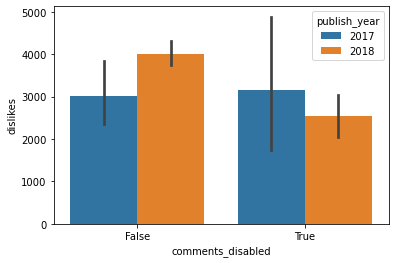

In [50]:
sns.barplot(x="comments_disabled",y="dislikes",data=US_video,hue="publish_year")



<AxesSubplot:xlabel='comments_disabled', ylabel='views'>

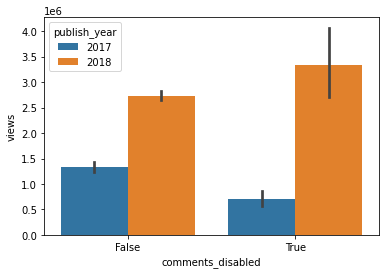

In [51]:
sns.barplot(x="comments_disabled",y="views",data=US_video,hue="publish_year")




In [52]:
US_video.groupby("comments_disabled")["views","likes","dislikes"].mean()

<ipython-input-52-213ee72b5c0c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  US_video.groupby("comments_disabled")["views","likes","dislikes"].mean()


,views,likes,dislikes
comments_disabled,,,
False,2.375077e+06,75638.569044,3754.405022
True,2.558786e+06,21789.430177,2727.913323


False    40486
True       162
Name: ratings_disabled, dtype: int64


<AxesSubplot:xlabel='ratings_disabled', ylabel='count'>

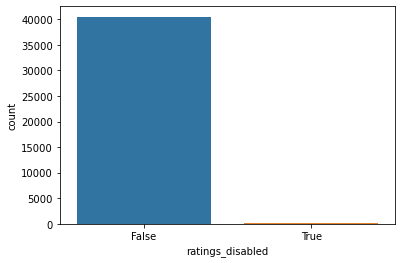

In [53]:
print(US_video["ratings_disabled"].value_counts())
sns.countplot(x="ratings_disabled",data=US_video)

<AxesSubplot:xlabel='ratings_disabled', ylabel='likes'>

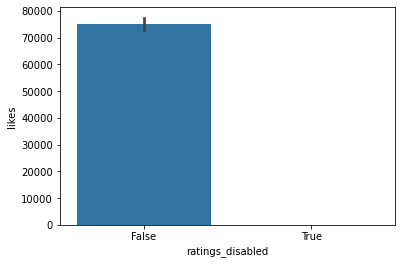

In [54]:
sns.barplot(x="ratings_disabled",y="likes",data=US_video)

<AxesSubplot:xlabel='ratings_disabled', ylabel='dislikes'>

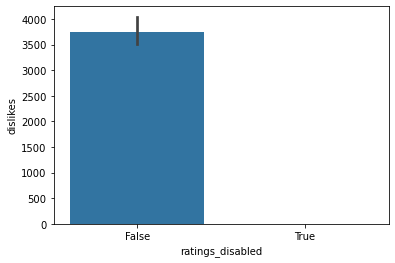

In [55]:
sns.barplot(x="ratings_disabled",y="dislikes",data=US_video)

<AxesSubplot:xlabel='ratings_disabled', ylabel='views'>

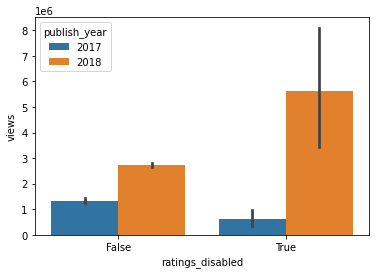

In [56]:
sns.barplot(x="ratings_disabled",y="views",data=US_video,hue="publish_year")

<AxesSubplot:xlabel='ratings_disabled', ylabel='comment_count'>

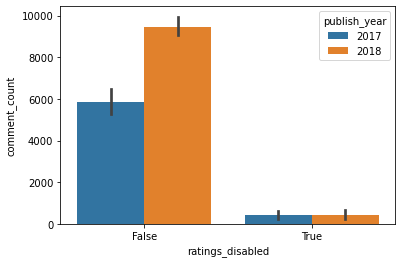

In [57]:
sns.barplot(x="ratings_disabled",y="comment_count",data=US_video,hue="publish_year")


In [58]:
US_video.groupby("ratings_disabled")["views","likes","dislikes","comment_count"].mean()

<ipython-input-58-2cdbeb3bbddd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  US_video.groupby("ratings_disabled")["views","likes","dislikes","comment_count"].mean()


,views,likes,dislikes,comment_count
ratings_disabled,,,,
False,2.370197e+06,75112.59549,3753.632144,8541.09050
True,4.301190e+06,0.00000,0.000000,429.91358


False    40625
True        23
Name: video_error_or_removed, dtype: int64


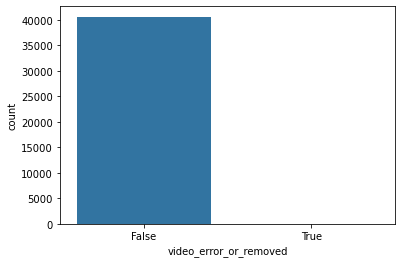

In [59]:
sns.countplot(x="video_error_or_removed",data=US_video)
print(US_video["video_error_or_removed"].value_counts())

<ipython-input-60-330a62c5ca71>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  US_video.groupby("video_error_or_removed")["views","likes","dislikes","comment_count"].mean()


,views,likes,dislikes,comment_count
video_error_or_removed,,,,
False,2.378301e+06,74827.983286,3739.972209,8512.128788
True,1.657090e+06,48770.434783,1442.608696,2565.391304


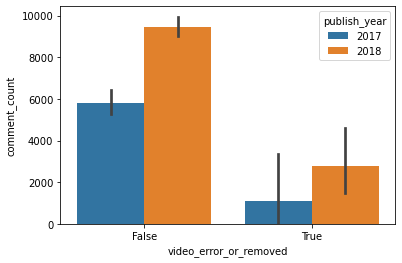

In [60]:

sns.barplot(x="video_error_or_removed",y="comment_count",data=US_video,hue="publish_year")
US_video.groupby("video_error_or_removed")["views","likes","dislikes","comment_count"].mean()

<AxesSubplot:xlabel='video_error_or_removed', ylabel='likes'>

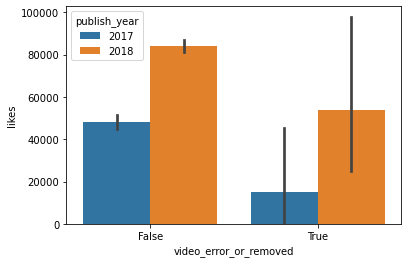

In [61]:
sns.barplot(x="video_error_or_removed",y="likes",data=US_video,hue="publish_year")

<AxesSubplot:xlabel='video_error_or_removed', ylabel='dislikes'>

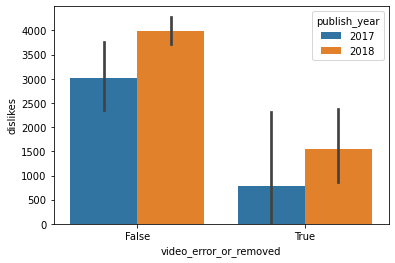

In [62]:
sns.barplot(x="video_error_or_removed",y="dislikes",data=US_video,hue="publish_year")

<AxesSubplot:xlabel='video_error_or_removed', ylabel='views'>

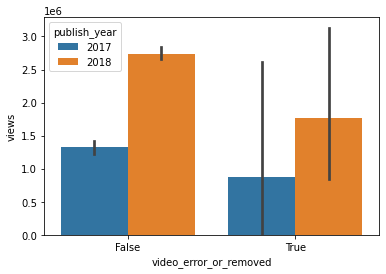

In [63]:
sns.barplot(x="video_error_or_removed",y="views",data=US_video,hue="publish_year")

In [64]:
print(US_video["tags"].value_counts())

[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                       1485
ABC|"americanidol"|"idol"|"american idol"|"ryan"|"seacrest"|"ryan seacrest"|"katy"|"perry"|"katy perry"|"luke"|"bryan"|"luke bryan"|"lionel"|"richie"|"lionel richie"|"season 16"|"american idol XVI"|"television"|"ad"|"spring"|"2018"|"music"|"reality"|"competition"|"song"|"sing"|"audition"|"auditions"|"performance"|"live"|"fox"|"AI"|"hollywood"|"contestant"|"official"|"american"|"official american idol"|"hollywood week"|"hometown audition"      87
Jacksfilms|"Jack Douglass"|"YGS"|"YGS 100"|"YGS 50"|"The Best of Your Grammar Sucks"|"Your Grammar S

In [65]:
print(US_video["description"].value_counts())

► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [66]:
US_video.drop(["tags","description","title","channel_title","publish_time","video_id","thumbnail_link","trending_date"],axis=1,inplace=True)

In [67]:
data1=US_video.copy(deep=True)

In [68]:
data1["comments_disabled"]=(data1["comments_disabled"]=="True").astype(int)

In [69]:
data1["ratings_disabled"]=(data1["ratings_disabled"]=="True").astype(int)

In [70]:
data1["video_error_or_removed"]=(data1["video_error_or_removed"]=="True").astype(int)

In [71]:
data1["likes"]=np.log(data1["likes"])

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [72]:
data1["dislikes"]=np.log(data1["dislikes"])

In [73]:
data1["views"]=np.log(data1["views"])

In [74]:
data1["comment_count"]=np.log(data1["comment_count"])

In [75]:
data1["views"]=data1["views"].replace([np.inf,-np.inf],np.nan)

In [76]:
data1["dislikes"]=data1["dislikes"].replace([np.inf,-np.inf],np.nan)

In [77]:
data1["likes"]=data1["likes"].replace([np.inf,-np.inf],np.nan)
data1["comment_count"]=data1["comment_count"].replace([np.inf,-np.inf],np.nan)
data1.isnull().sum()
data1.dropna(axis=0,how='any',inplace=True)

In [78]:
data1=pd.get_dummies(data1,drop_first=True)
x=data1.drop("likes",axis=1,inplace=False)
x=x.values
y=data1["likes"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


lgr=LinearRegression(fit_intercept=True)
fit_model=lgr.fit(x_train,y_train)
prediction=lgr.predict(x_test)

print(fit_model.score(x_test,y_test))
print(r2_score(y_test,prediction))

0.9071937297912798
0.9071937297912798


0.0038550257562513035


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

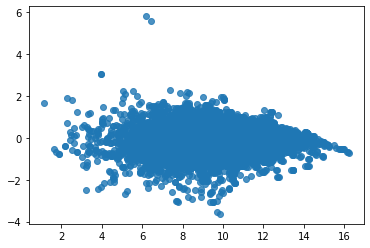

In [79]:
residual=y_test-prediction
print(residual.mean())
sns.regplot(prediction,residual,fit_reg=False)

In [80]:
base_pred=np.repeat(np.mean(y_test),len(y_test))
base_rms=np.sqrt(mean_squared_error(y_test,base_pred))
rms=np.sqrt(mean_squared_error(y_test,prediction))
print(base_rms)
print(rms)

1.928061562596312
0.5873670180748854


In [81]:
x1=data1.drop("likes",axis=1,inplace=False)
x1=sm.add_constant(x1)
y1=data1["likes"]

model=sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          4.726e+05
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                        0.00
Time:                        23:26:23   Log-Likelihood:                         -35165.
No. Observations:               39781   AIC:                                  7.038e+04
Df Residuals:                   39757   BIC:                                  7.058e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [82]:
x1

,const,views,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_day,publish_month,publish_year,...,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_43
0,1.0,13.525658,7.994970,9.677465,0,0,0,13,11,2017,...,0,1,0,0,0,0,0,0,0,0
1,1.0,14.698775,8.723557,9.449593,0,0,0,13,11,2017,...,0,0,0,1,0,0,0,0,0,0
2,1.0,14.975981,8.582794,9.009570,0,0,0,12,11,2017,...,0,0,1,0,0,0,0,0,0,0
3,1.0,12.745975,6.501290,7.671361,0,0,0,13,11,2017,...,0,0,0,1,0,0,0,0,0,0
4,1.0,14.555413,7.595387,9.770984,0,0,0,12,11,2017,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,1.0,14.337637,7.233455,7.884953,0,0,0,18,5,2018,...,0,0,0,0,0,0,0,0,0,0
40945,1.0,13.878296,5.945421,8.277920,0,0,0,18,5,2018,...,0,1,0,0,0,0,0,0,0,0
40946,1.0,13.879847,6.939254,8.292048,0,0,0,18,5,2018,...,0,0,0,1,0,0,0,0,0,0
40947,1.0,15.549078,7.953670,9.479451,0,0,0,17,5,2018,...,0,0,0,0,0,0,0,0,0,0
